In [1]:
import dolfin as dl
import matplotlib.pyplot as plt

from nalger_helper_functions import plot_rectangle, function_support_box

Text(0.5, 1.0, 'rtol: inner=10%, outer=1%')

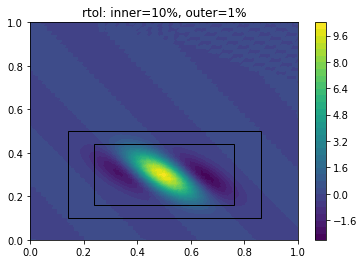

In [2]:
mesh = dl.UnitSquareMesh(50, 50)
V = dl.FunctionSpace(mesh, 'CG', 1)

e1 = dl.Expression('-10*sin(15*x[0] + 12*x[1])', domain=mesh, degree=5)
e2 = dl.Expression('-exp(-pow(6*(x[0]-0.5) + 10*(x[1]-0.3), 2))', domain=mesh, degree=5)
e3 = dl.Expression('-exp(-pow(3*(x[0]-0.5) - 6*(x[1]-0.3), 2))', domain=mesh, degree=5)

u = dl.project(e1*e2*e3, V)
cm = dl.plot(u)
plt.colorbar(cm)

X = V.tabulate_dof_coordinates()

# V_box_getter = FenicsFunctionSupportBoxGetter(V)

min_pt1, max_pt1 = function_support_box(u.vector()[:], X, support_rtol=1e-1)
min_pt2, max_pt2 = function_support_box(u.vector()[:], X, support_rtol=1e-2)


plot_rectangle(min_pt1, max_pt1)
plot_rectangle(min_pt2, max_pt2)
plt.title('rtol: inner=10%, outer=1%')